In [6]:
%cd ..
import numpy as np
from matplotlib import pyplot as plt
import pycircstat as pcs
from clwe.clwe import *

/home


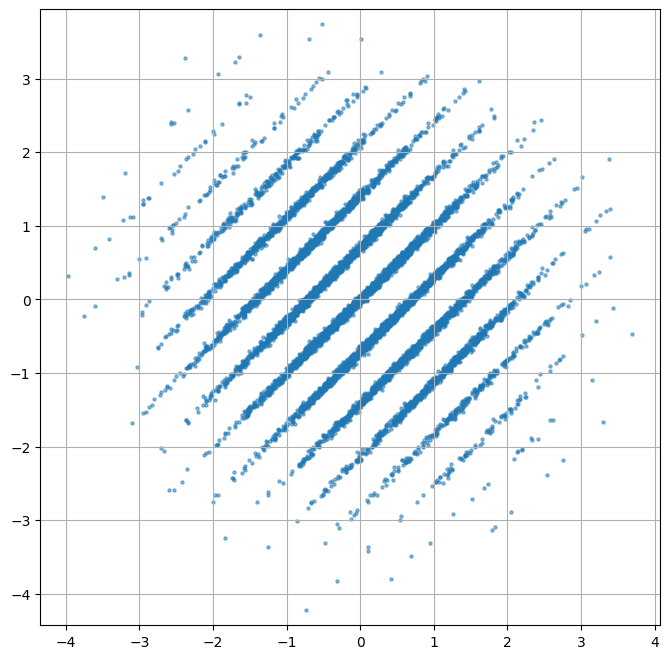

In [7]:
def plot_clwe():
    secret_direction = np.array([1.0, -1.0])
    secret_direction /= np.linalg.norm(secret_direction)
    raw_samples = get_random_samples((10000, 2), var=1)
    clwe_samples = project_to_clwe(raw_samples, secret_direction, 2, 0.05)
    plt.figure(figsize=(8, 8))
    # plt.scatter(raw_samples[:, 0], raw_samples[:, 1], s=5, alpha=0.5)
    plt.scatter(clwe_samples[:, 0], clwe_samples[:, 1], s=5, alpha=0.5)
    plt.axis('equal')
    plt.grid(True)
    # plt.savefig("pancakes.pdf")

plot_clwe()

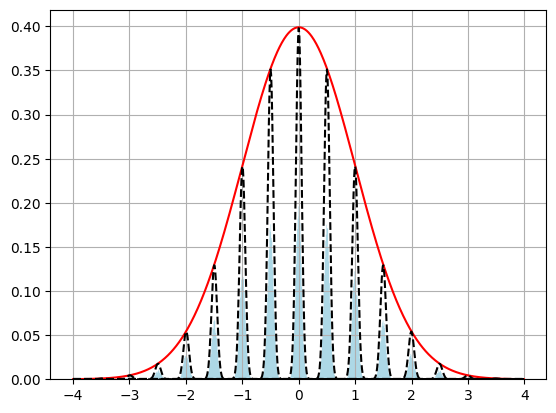

In [18]:
from scipy.stats import norm

from matplotlib.lines import Line2D
from matplotlib.legend import Legend
Line2D._us_dashSeq    = property(lambda self: self._dash_pattern[1])
Line2D._us_dashOffset = property(lambda self: self._dash_pattern[0])
Legend._ncol = property(lambda self: self._ncols)

gamma = 2
beta = 0.1
samples = 100000
raw_samples = get_random_samples((samples, 2), var=1)
clwe_samples = project_to_clwe(raw_samples, np.array([1.0, 0.0]), gamma, beta)
counts, bins = np.histogram(clwe_samples[:, 0], np.arange(-4, 4, 0.01), density=True)
counts /= 8
plt.stairs(counts, bins, color='lightblue', fill=True)

x_vals = np.arange(-4, 4, 1e-2)
plt.plot(x_vals, norm.pdf(x_vals, 0, 1), 'r')
for z in np.arange(-10, 10, 1):
    plt.plot(x_vals, norm.pdf(x_vals, z/gamma, beta/gamma)*norm.pdf(x_vals, 0, 1)/8, 'k--')

plt.grid(True)
# plt.savefig("test.pdf")

raw KS score 3.9366284204858765e-11
pure CLWE score 0.0
CLWE score 0.0
noisy CLWE score 0.0


PermissionError: [Errno 13] Permission denied: 'clwe_rose.pdf'

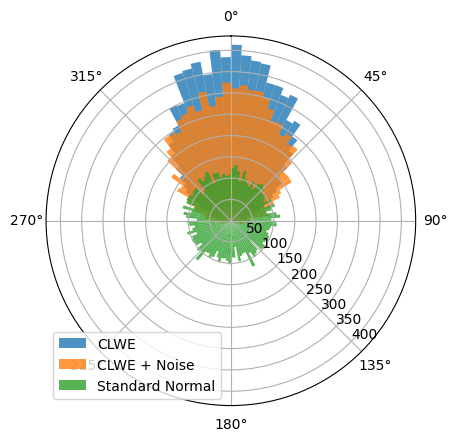

In [ ]:
dims = (10000, 64)
secret_dim = (64,)
gamma = 0.4
beta = 0.1
bins = np.arange(0, 0.5, 0.5/100)

def plot_z_vals(errors, n_bins = 100, ax = None):
    hist, bin_edges = np.histogram(2 * np.pi * errors, bins=n_bins, range=(0, 2*np.pi))
    bin_centres = (bin_edges[:-1] + bin_edges[1:]) / 2
    if ax is None:
        ax = plt.subplot(111, projection='polar')
        ax.set_theta_zero_location("N")  # Start at the top
        ax.set_theta_direction(-1)  # Go clockwise
        ax.set_rlabel_position(135)
    bars = ax.bar(bin_centres, hist, width=2*np.pi/n_bins, bottom=0.0, alpha=0.8)
    return ax

def plot_rose(samples, secret_direction, gamma):
    errors = get_hclwe_errors(samples, secret_direction, gamma)
    return plot_z_vals(errors)

def get_rayleigh_score(samples, secret_direction, gamma):
    errors = get_hclwe_errors(samples, secret_direction, gamma)
    return pcs.tests.rayleigh(2 * np.pi * errors)[0]

secret_direction = sample_unit_vector(secret_dim)
raw_samples = get_random_samples(dims, var=1)
print("raw KS score", get_hclwe_score(raw_samples, secret_direction, gamma))

clwe_samples = project_to_clwe(raw_samples, secret_direction, gamma)
# plt.hist(get_hclwe_errors(clwe_samples, secret_direction, gamma))
print("pure CLWE score", get_hclwe_score(clwe_samples, secret_direction, gamma))

clwe_samples = project_to_clwe(raw_samples, secret_direction, gamma, beta)
print("CLWE score", get_hclwe_score(clwe_samples, secret_direction, gamma))
noisy_samples = clwe_samples + get_random_samples(dims, var=0.2)
print("noisy CLWE score", get_hclwe_score(noisy_samples, secret_direction, gamma))

plot_rose(clwe_samples, secret_direction, gamma)
plot_rose(noisy_samples, secret_direction, gamma)
plot_rose(raw_samples, secret_direction, gamma)
plt.legend(["CLWE", "CLWE + Noise", "Standard Normal"], loc=3)
# plt.savefig("clwe_rose.pdf")

# print(raw_samples[:1000,:].shape)
print("Raw score", get_rayleigh_score(raw_samples[:256,:], secret_direction, gamma))
print("CLWE score", get_rayleigh_score(clwe_samples[:256,:], secret_direction, gamma))
print("CLWE + Noise score", get_rayleigh_score(noisy_samples[:256,:], secret_direction, gamma))
